In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pylab as pylab

In [2]:
 y,sr=librosa.load(file_to_open,duration=5)
sound,_=librosa.effects.trim(y)
librosa.display.waveplot(sound,sr=sr,alpha=0.5)

NameError: name 'file_to_open' is not defined

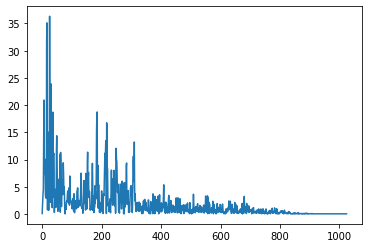

In [39]:
#aplicamos la transformada de fourier
n_fft=2048
D=np.abs(librosa.stft(sound[:n_fft],n_fft=n_fft,hop_length=n_fft+1))
plt.plot(D)

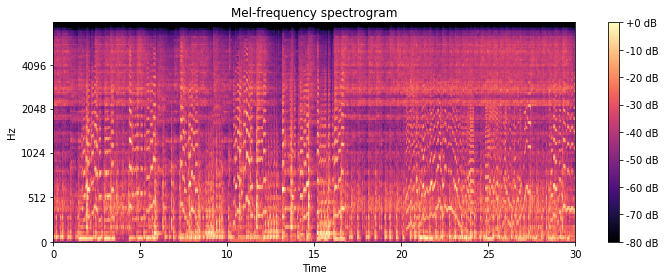

<Figure size 432x288 with 0 Axes>

In [35]:
S=librosa.feature.melspectrogram(y=y, sr=sr)

plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sr,
                          fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
g=""
plt.savefig('img.png')
plt.clf()

In [ ]:
import IPython.display as ipd
ipd.Audio(file_to_open)


In [15]:
from pathlib import Path

data_folder = Path("data/genres")
folder=Path("img_data/train_data")

    
genero=["blues",
       "classical",
       "country",
       "disco",
       "hiphop",
       "jazz",
       "metal",
       "pop",
       "reggae",
       "rock"]

file_type=".wav"


#recorre todos los datos
y=[]
sr=[]
for i in range(10):
    print(i)
    folder=Path("img_data/train_data")
    for j in range(100):
        
        #paths para recorrer carpetas
        if j<10:
            file_name= genero[i]+".0000"+str(j)+file_type
            file_to_open= data_folder / genero[i] / file_name
        else:
            file_name= genero[i]+".000"+str(j)+file_type
            file_to_open= data_folder / genero[i] / file_name
            
        #lee el archivo de audio
        y,sr=librosa.load(file_to_open, duration=30)
        
        #genera el espectograma
        S=librosa.feature.melspectrogram(y=y,
                                         sr=sr,
                                         n_fft=1024,
                                         hop_length=512)
        
        S_dB = librosa.power_to_db(S, ref=np.max)  #pasa a decibeles
        ST=np.transpose(S_dB)
    
        pylab.figure(figsize=(3,3))
        pylab.axis('off') 
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
        librosa.display.specshow(S_dB)#, cmap="gray")
        
        
        if j<10:
            file_name= genero[i]+".0000"+str(j)+".jpg"
            save= folder / genero[i] / file_name
        else:
            file_name= genero[i]+".000"+str(j)+".jpg"
            save= folder / genero[i] / file_name     
        
        if j==79:
            folder=Path("img_data/test_data")
        
        pylab.savefig(save, bbox_inches=None, pad_inches=0)
        pylab.close()
      

0
1
2
3
4
5
6
7
8
9


In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch.optim.lr_scheduler import ExponentialLR
# from modelos import RegresionMultinomial, RedNeuronal, RedNeuronal_Sigmoid, RedNeuronal_ReLu
# from modelos import RedNeuronal3_Sigmoid, RedNeuronal3_ReLu, RedNeuronal5_Sigmoid, RedNeuronal5_ReLu
import random
import numpy as np
# colores para print
class color:
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   CYAN = '\033[96m'
   END = '\033[0m'

In [2]:
input_size  = 3*216*216 # Dimension de datos de entrada (28 x 28)
num_classes = 10        # MNIST tiene 10 clases (numeros del 1 al 10)
num_epochs  = 10        # Numero de epocas para entrenar
bs          = 25        # Tamano de lote (batch_size)

In [8]:
from pathlib import Path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def load_dataset():
    data_path = Path("img_data/train_data")
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.ToTensor()
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=bs,
        num_workers=0,
        shuffle=True
    )
    
    
    data_path = Path("img_data/test_data")
    test_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.ToTensor()
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=bs,
        num_workers=0,
        shuffle=True
    )
    
    return train_loader , test_loader

train_loader, test_loader=load_dataset()

In [9]:
#para checar las dimensiones de la imagen
for i, (xi, yi) in enumerate(test_loader):
            print(xi.shape)
            print(yi.shape)
            #xi= xi.reshape(-1, 128*1293).to(device) # imagenes y reshape se cargan a CPU
            #yi #= yi.to(device) # etiquetas  clasi

torch.Size([25, 3, 216, 216])
torch.Size([25])
torch.Size([25, 3, 216, 216])
torch.Size([25])
torch.Size([25, 3, 216, 216])
torch.Size([25])
torch.Size([25, 3, 216, 216])
torch.Size([25])
torch.Size([25, 3, 216, 216])
torch.Size([25])
torch.Size([25, 3, 216, 216])
torch.Size([25])
torch.Size([25, 3, 216, 216])
torch.Size([25])
torch.Size([25, 3, 216, 216])
torch.Size([25])


In [7]:
learning_rates = [.001]
nombre_modelo  = "Red de 2 capas escondidas (200 y 60 unidades)"
nro_modelo     = 1

for lr in learning_rates:
    model = RedNeuronal2_ReLU(input_size, num_classes).to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    torch.manual_seed(123456789)
    perd_train = []
    perd_test  = []
    prec_train = []
    prec_test  = []
    epocas = []
    i=0
# ==================
# Entrenamiento del modelo
# ==================
    for epoch in range(num_epochs):
        for i, (xi, yi) in enumerate(train_loader):
            xi = xi.reshape(-1, 3*216*216).to(device) # imagenes y reshape se cargan a CPU
            yi = yi.to(device) # etiquetas  clasificación se carga a CPU
            # Propagacion para adelante
            output = model(xi) # prediccion del modelo
            loss = loss_function(output, yi) # evaluacion de la funcion de perdida
            # Propagacion para atras y paso de optimizacion
            optimizer.zero_grad() 
            loss.backward()
            optimizer.step()
            if (i+1) % 4 == 0:
                print(color.END + 'Epoca: {}/{}, Paso: {}/{}, Perdida:{:.5f}'.format(epoch+1,
                       num_epochs, i+1, len(train_loader), loss.item()))

                # guarda datos por época        
                perd_train.append(perdida(model, prueba=False))
                perd_test.append(perdida(model, prueba=True))
                prec_train.append(precision(model, prueba=False))
                prec_test.append(precision(model, prueba=True))
                epocas.append(epoch+1+((i+1)/len(train_loader)))
    
    # gráfica por modelo
    print(color.BLUE + '='*50)
    print(color.BLUE + f'Modelo # {nro_modelo}')
    print(color.BLUE + f'{nombre_modelo}')
    print(color.BLUE + f'Tasa de aprendizaje: {lr}')
    graficas(epocas,perd_train,perd_test,prec_train,prec_test)
    print(color.BLUE + '='*50)
    nro_modelo += 1

Epoca: 1/10, Paso: 4/32, Perdida:16.71714


NameError: name 'perdida' is not defined

In [10]:
def precision1(model, prueba=True):
    """
    Esta función calcula la precisión del modelo
    ARGS:
      * model: modelo definido en pytorch -
            model(input_size, num_classes).to(device)
      * Prueba = True: calcular la precisión sobre train_data
               = False: calcular la precisión sobre test_data
    """
    correct, total = (0,0)
    loader = test_loader if prueba else train_loader
    with torch.no_grad():
        for xi, yi in loader:
            yi = yi.to(device)
            output = model(xi)
            _, predicted = torch.max(output.data, 1)
            total += yi.size(0)
            correct += (predicted == yi).sum().item()    
        
    return correct/total

def perdida1(model, prueba=True):
    """
    Esta función evalúa la función de pérdida del modelo
    ARGS:
      * model: modelo definido en pytorch -
            model(input_size, num_classes).to(device)
      * Prueba = True: computar la f. de pérdida sobre train_data
                = False: computar la f. de pérdida sobre test_data
    """    
    trainset_loss = 0.0
    loader = test_loader if prueba else train_loader
    with torch.no_grad():
        for xi, yi in loader:
            yi = yi.to(device)
            output = model(xi)
            loss = loss_function(output, yi)
            batch_loss = loss.item() * yi.size(0)
            trainset_loss += batch_loss
    return trainset_loss

# función para entrenar las arquitecturas de redes convolucionales

def entrenamiento_cnn(model, lr=.01, gamma=0.6, num_classes = 10):    
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # define al ajustador de lr
    scheduler = ExponentialLR(optimizer, gamma, last_epoch=-1)

    torch.manual_seed(123456789)
    perd_train = []
    perd_test  = []
    prec_train = []
    prec_test  = []
    epocas  = []
    
# ==================
# Entrenamiento del modelo
# ==================
    for epoch in range(num_epochs):
        for i, (xi, yi) in enumerate(train_loader):
           # xi = xi.reshape(-1, 28*28).to(device) # imagenes y reshape se cargan a CPU - comentar
            yi = yi.to(device) # etiquetas  clasificación se carga a CPU
            # Propagacion para adelante
            output = model(xi) # prediccion del modelo
            loss = loss_function(output, yi) # evaluacion de la funcion de perdida
            # Propagacion para atras y paso de optimizacion
            optimizer.zero_grad() 
            loss.backward()
            # actualizar parámetros del modelo
            optimizer.step()
            
            if (i+1) % 10 == 0:
                print(color.END + 'Epoca: {}/{}, Paso: {}/{}, Perdida:{:.5f}'.format(epoch+1,
                       num_epochs, i+1, len(train_loader), loss.item()))
            
                # guarda datos por época        
                perd_train.append(perdida1(model, prueba=False))
                perd_test.append(perdida1(model, prueba=True))
                prec_train.append(precision1(model, prueba=False))
                prec_test.append(precision1(model, prueba=True))
                epocas.append(epoch+1+((i+1)/len(train_loader)))
                
         # se ajusta la magnitud de la lr exp. en cada época
        scheduler.step()
    
    # gráfica por modelo
    print(color.BLUE + '='*50)
    print(color.BLUE + f'Tasa de aprendizaje inicial: {lr}')
    graficas(epocas, perd_train, perd_test, prec_train, prec_test)
    print(color.BLUE + '='*50)

In [11]:
import torch.nn.functional as F
dropout_prob = 0.5 

class RedConvolucional_test(nn.Module):
    def __init__(self, num_classes=10):
        super(RedConvolucional_test, self).__init__()
        # a) Capa convolucional con activaciones ReLU, tamaño de kernel 3, 
        # stride 1, y salida de 12 canales.
        self.drop_out = nn.Dropout()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, out_channels = 100, kernel_size=9), # , stride=1, padding=1
            nn.BatchNorm2d(100),
            nn.ReLU(),
            nn.MaxPool2d(9,9)) # , stride=2
        # b) Capa densa con 200 unidades y activaciones ReLu
        self.layer4 = nn.Sequential(
            nn.Linear(52900, 10),
            nn.ReLU())
        # capa output : clasificación a 10 clases
        self.fc = nn.Linear(10, num_classes)  

    def forward(self, x):
        out = self.layer1(x)
        out = self.drop_out(out)
        out = out.reshape(out.size(0), -1)
        # capas densas
        out = self.layer4(out)
#        out = self.drop_out(out)       
        out = self.fc(out)
        return out

In [12]:
# Entrenamiento y evaluación del modelo
modelo = RedConvolucional_test().to(device)
entrenamiento_cnn(model=modelo)

Epoca: 1/10, Paso: 10/32, Perdida:2.80317


KeyboardInterrupt: 

In [ ]:
#perd_train 
#perd_test  
#prec_train
#prec_test  
epocas 

In [6]:
# ==================
# Red neuronal de 2 capas escondidas (200 y 60 unidades)
# con activaciones ReLU
# ==================
class RedNeuronal2_ReLU(nn.Module):
    def __init__(self, input_size, num_classes):
        super(RedNeuronal2_ReLU, self).__init__() 
        
        hidden_size1 = 200
        hidden_size2 = 60
        
        # 1ra capa escondida
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        # 2da capa escondida
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        # capa Output
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        
    def forward(self, x):
        
        # 1ra capa escondida
        out = self.fc1(x)
        out = self.relu(out)
        # 2da capa escondida
        out = self.fc2(out)
        out = self.relu(out)
        # capa Output
        out = self.fc3(out)
        # out = self.relu(out) # en la última etapa se computa el logit

        return out

In [17]:
def precision(model, prueba=True):
    """
    Esta función calcula la precisión del modelo
    ARGS:
      * model: modelo definido en pytorch -
            model(input_size, num_classes).to(device)
      * Prueba = True: calcular la precisión sobre train_data
               = False: calcular la precisión sobre test_data
    """
    correct, total = (0,0)
    loader = test_loader if prueba else train_loader
    with torch.no_grad():
        for xi, yi in loader:
            xi = xi.reshape(-1,3*216*216).to(device)
            yi = yi.to(device)
            output = model(xi)
            _, predicted = torch.max(output.data, 1)
            total += yi.size(0)
            correct += (predicted == yi).sum().item()
    return correct/total

def perdida(model, prueba=True):
    """
    Esta función evalúa la función de pérdida del modelo
    ARGS:
      * model: modelo definido en pytorch -
            model(input_size, num_classes).to(device)
      * Prueba = True: computar la f. de pérdida sobre train_data
                = False: computar la f. de pérdida sobre test_data
    """    
    trainset_loss = 0.0
    loader = test_loader if prueba else train_loader
    with torch.no_grad():
        for xi, yi in loader:
            xi = xi.reshape(-1,3*216*216).to(device)
            yi = yi.to(device)
            output = model(xi)
            loss = loss_function(output, yi)
            # [COMENTARIO 1]: ver abajo 
            # ¿Por que multiplicamos por yi.size(0)? El tamaño de yi.size(0) es de 100 y debemos multiplicarlo
            # en la perdida por lote dado que estamoscomputando el promedio, en dicha medida ajustamos la pérdida
            # total por lote. Es decir, por el número total de etiquetas.
            batch_loss = loss.item() * yi.size(0)
            trainset_loss += batch_loss
    return trainset_loss
        
# Función para generar gráficas

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

    
def graficas(epocas,perd_train,perd_test,prec_train,prec_test):
    """
    Esta función grafica en dos subpáneles el desempeño del modelo
        - Panel 1,1: Función de pérdida en entrenamiento y prueba
        - Panel 1,2: Precisión en entrenamiento y prueba
    """
    
    plt.figure(figsize=(8,9))
    #fig.set_figheight(8)
    #fig.set_figwidth(9)
    # función de pérdida
    plt.subplot(2, 1, 1)
    plt.plot(epocas, perd_train, '-', color='tab:cyan', label = 'Entrenamiento')
    plt.plot(epocas, perd_test, '-', color='tab:red', label = 'Prueba')
    plt.title(f'Desempeño iterativo del modelo', fontweight="bold")
    plt.ylabel('Función de pérdida')
    plt.legend(loc='upper left')
    
    # precisión
    plt.subplot(2, 1, 2)
    plt.plot(epocas, prec_train, '-', color='tab:cyan')
    plt.plot(epocas, prec_test,'-' ,color='tab:red')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    #fig.tight_layout()
    plt.show()

In [16]:
import numpy as np
import pprint

Text(0.5, 1.0, 'Imagen en escala de grises')

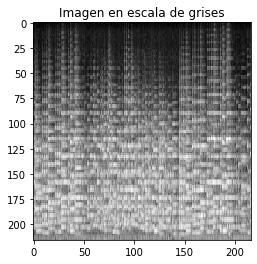

In [24]:
img=plt.imread('classical.00042.jpg')
img2=img[:,:,0]
imgplot = plt.imshow(img2, cmap='gray')

plt.title('Imagen en escala de grises')

In [23]:
img2.shape

(216, 216)

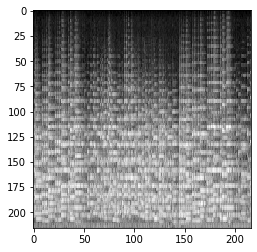

In [25]:
imgplot = plt.imshow(img, cmap='gray')

In [26]:
img.shape

(216, 216, 3)